In [1]:
!pip install numpy==1.24.4 kaggle

In [2]:
!kaggle datasets list

ref                                                          title                                                      size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  --------------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
jayaantanaath/student-habits-vs-academic-performance         Student Habits vs Academic Performance                    19512  2025-04-12 10:49:08.663000          22630        391  1.0              
adilshamim8/cost-of-international-education                  Cost of International Education                           18950  2025-05-07 15:41:53.213000           4247         74  1.0              
adilshamim8/social-media-addiction-vs-relationships          Students' Social Media Addiction                           7851  2025-05-10 14:38:02.713000           1900         29  1.0              
fatemehmoh

In [3]:
# 📦 Install required libraries
!pip install kaggle scikit-surprise networkx matplotlib seaborn --quiet

print("Libraries installed successfully!")

Libraries installed successfully!


In [4]:
# 🔑 Upload your Kaggle API key
from google.colab import files
uploaded = files.upload()  # Upload your kaggle.json file when prompted

# 🔐 Setup Kaggle credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# ⬇️ Download and unzip the dataset
!kaggle datasets download -d zygmunt/goodbooks-10k
!unzip goodbooks-10k.zip -d goodbooks

print("Dataset downloaded and extracted successfully!")

Saving kaggle.json to kaggle (1).json
Dataset URL: https://www.kaggle.com/datasets/zygmunt/goodbooks-10k
License(s): CC-BY-SA-4.0
goodbooks-10k.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  goodbooks-10k.zip
replace goodbooks/book_tags.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: goodbooks/book_tags.csv  
replace goodbooks/books.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: goodbooks/books.csv     
replace goodbooks/ratings.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: goodbooks/ratings.csv   
replace goodbooks/sample_book.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: goodbooks/sample_book.xml  
replace goodbooks/tags.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: goodbooks/tags.csv      
replace goodbooks/to_read.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: goodbooks/to_read.csv   
Dataset downloaded and extracted successfully!


Books dataset shape: (10000, 23)
Ratings dataset shape: (981756, 3)

Books sample:
   id  book_id  best_book_id  work_id  books_count       isbn        isbn13  \
0   1  2767052       2767052  2792775          272  439023483  9.780439e+12   
1   2        3             3  4640799          491  439554934  9.780440e+12   
2   3    41865         41865  3212258          226  316015849  9.780316e+12   

                       authors  original_publication_year  \
0              Suzanne Collins                     2008.0   
1  J.K. Rowling, Mary GrandPré                     1997.0   
2              Stephenie Meyer                     2005.0   

                             original_title  ... ratings_count  \
0                          The Hunger Games  ...       4780653   
1  Harry Potter and the Philosopher's Stone  ...       4602479   
2                                  Twilight  ...       3866839   

  work_ratings_count  work_text_reviews_count  ratings_1  ratings_2  \
0            494236

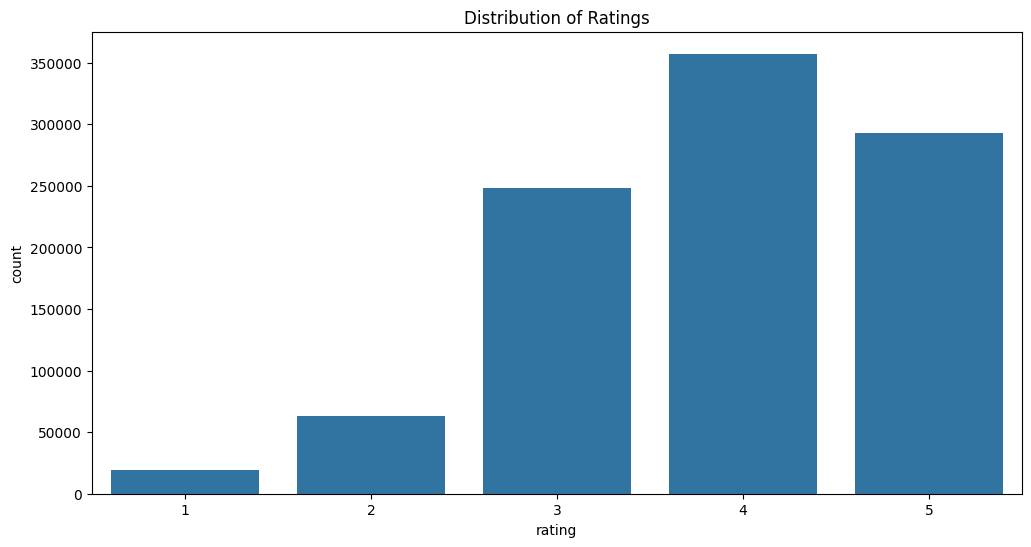


Top 5 rated books:
                                               title  avg_rating  rating_count
0                         Still Life with Woodpecker    4.777778            99
1                           The Beautiful and Damned    4.660000           100
2                                    Villa Incognito    4.618557            97
3  Peter and the Shadow Thieves (Peter and the St...    4.557143            70
4                         The Taste of Home Cookbook    4.550000           100


In [5]:
# 📊 Load and explore datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
books_df = pd.read_csv('goodbooks/books.csv')
ratings_df = pd.read_csv('goodbooks/ratings.csv')

# Display basic info
print("Books dataset shape:", books_df.shape)
print("Ratings dataset shape:", ratings_df.shape)
print("\nBooks sample:")
print(books_df.head(3))
print("\nRatings sample:")
print(ratings_df.head(3))

# Data visualization
plt.figure(figsize=(12, 6))
sns.countplot(x='rating', data=ratings_df)
plt.title('Distribution of Ratings')
plt.show()

# Top rated books
top_books = ratings_df.groupby('book_id').agg({'rating': ['mean', 'count']})
top_books.columns = ['avg_rating', 'rating_count']
top_books = top_books.sort_values(by=['avg_rating', 'rating_count'], ascending=False)
top_books = top_books.merge(books_df, on='book_id')[['title', 'avg_rating', 'rating_count']]
print("\nTop 5 rated books:")
print(top_books.head())

In [6]:
# 🔍 Content-based filtering using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Combine title and authors for better content representation
books_df['content'] = books_df['title'] + " " + books_df['authors']

# Create TF-IDF matrix
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(books_df['content'])

# Compute cosine similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Function to get content-based recommendations
def content_recommendations(title, top_n=10):
    idx = books_df[books_df['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    book_indices = [i[0] for i in sim_scores]
    return books_df.iloc[book_indices][['title', 'authors']]

# Example usage
print("Content-based recommendations for 'The Hobbit':")
print(content_recommendations('The Hobbit'))

Content-based recommendations for 'The Hobbit':
                                                  title  \
963   J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...   
1128   The History of the Hobbit, Part One: Mr. Baggins   
2308                              The Children of Húrin   
465                           The Hobbit: Graphic Novel   
4975       Unfinished Tales of Númenor and Middle-Earth   
610            The Silmarillion (Middle-Earth Universe)   
154          The Two Towers (The Lord of the Rings, #2)   
160   The Return of the King (The Lord of the Rings,...   
18    The Fellowship of the Ring (The Lord of the Ri...   
8271                 The Complete Guide to Middle-Earth   

                                                authors  
963                                      J.R.R. Tolkien  
1128                   John D. Rateliff, J.R.R. Tolkien  
2308      J.R.R. Tolkien, Christopher Tolkien, Alan Lee  
465   Chuck Dixon, J.R.R. Tolkien, David Wenzel, Sea...  
4975        

In [7]:
# 👥 Collaborative filtering using SVD
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# Prepare data for Surprise
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_df[['user_id', 'book_id', 'rating']], reader)

# Split data
trainset, testset = train_test_split(data, test_size=0.2)

# Train SVD algorithm
svd = SVD(n_factors=100, n_epochs=20, lr_all=0.005, reg_all=0.02)
svd.fit(trainset)

# Evaluate on test set
predictions = svd.test(testset)
print("RMSE:", accuracy.rmse(predictions))
print("MAE:", accuracy.mae(predictions))

# Function to get collaborative recommendations
def collab_recommendations(user_id, top_n=10):
    user_ratings = ratings_df[ratings_df['user_id'] == user_id]
    all_books = books_df[~books_df['book_id'].isin(user_ratings['book_id'])]

    predictions = []
    for book_id in all_books['book_id'].sample(1000):  # Limit to 1000 for speed
        pred = svd.predict(user_id, book_id)
        predictions.append((book_id, pred.est))

    predictions.sort(key=lambda x: x[1], reverse=True)
    top_books = [x[0] for x in predictions[:top_n]]
    return books_df[books_df['book_id'].isin(top_books)][['title', 'authors']]

# Example usage
print("\nCollaborative recommendations for user 1:")
print(collab_recommendations(1))

RMSE: 0.8429
RMSE: 0.8428593274139017
MAE:  0.6593
MAE: 0.6593105870504391

Collaborative recommendations for user 1:
                                               title  \
92                                 The Secret Garden   
1316                                   Drowning Ruth   
1319             The Complete Sherlock Holmes, Vol 2   
1387                                  The Last Juror   
1676                                            Next   
2278       Neither Here nor There: Travels in Europe   
3002       A Woman of Substance (Emma Harte Saga #1)   
7593     QED: The Strange Theory of Light and Matter   
7682  What to Expect the First Year (What to Expect)   
8837                                    Lost Horizon   

                                                authors  
92                              Frances Hodgson Burnett  
1316                                  Christina Schwarz  
1319                   Arthur Conan Doyle, Kyle Freeman  
1387                             

In [8]:
# 🤖 Hybrid recommendation system
def hybrid_recommend(user_id, book_title, top_n=10):
    # Content-based
    try:
        idx = books_df[books_df['title'] == book_title].index[0]
        sim_scores = list(enumerate(cosine_sim[idx]))
        content_rec = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n*2+1]
    except:
        content_rec = []

    # Collaborative
    user_ratings = ratings_df[ratings_df['user_id'] == user_id]
    all_books = books_df[~books_df['book_id'].isin(user_ratings['book_id'])]

    collab_rec = []
    for book_id in all_books['book_id'].sample(100):  # Limit for speed
        pred = svd.predict(user_id, book_id)
        collab_rec.append((book_id, pred.est))

    # Combine recommendations
    recommendations = {}

    # Add content-based
    for idx, score in content_rec:
        book_id = books_df.iloc[idx]['book_id']
        recommendations[book_id] = recommendations.get(book_id, 0) + score * 0.6

    # Add collaborative
    collab_rec.sort(key=lambda x: x[1], reverse=True)
    max_collab = max([x[1] for x in collab_rec]) if collab_rec else 1
    for book_id, score in collab_rec[:top_n*2]:
        recommendations[book_id] = recommendations.get(book_id, 0) + (score/max_collab) * 0.4

    # Get top recommendations
    top_books = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)[:top_n]
    result = []
    for book_id, score in top_books:
        title = books_df[books_df['book_id'] == book_id]['title'].values[0]
        authors = books_df[books_df['book_id'] == book_id]['authors'].values[0]
        result.append({"title": title, "authors": authors, "score": score})

    return pd.DataFrame(result)

# Example usage
print("\nHybrid recommendations for user 1 and 'The Hobbit':")
print(hybrid_recommend(1, 'The Hobbit'))


Hybrid recommendations for user 1 and 'The Hobbit':
                                               title  \
0  J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...   
1  Morality for Beautiful Girls (No. 1 Ladies' De...   
2                                        Hocus Pocus   
3                                   Tropic of Cancer   
4                                    The Corrections   
5   Shadow of a Dark Queen (The Serpentwar Saga, #1)   
6  The Mirror Crack'd from Side to Side (Miss Mar...   
7  The Five Dysfunctions of a Team: A Leadership ...   
8                                         Press Here   
9                                           Daughter   

                                   authors     score  
0                           J.R.R. Tolkien  0.426174  
1                   Alexander McCall Smith  0.400000  
2                        Kurt Vonnegut Jr.  0.396920  
3                             Henry Miller  0.372869  
4                         Jonathan Franzen  0.362494  


In [9]:
# 🖥️ Simple command-line interface
def recommendation_interface():
    print("\n=== Book Recommendation System ===\n")

    # Get user input
    user_id = int(input("Enter your user ID (1-10000): "))
    book_title = input("Enter a book title you like: ")

    # Get recommendations
    print("\nGenerating recommendations...")
    rec = hybrid_recommend(user_id, book_title)

    # Display results
    print("\nRecommended books for you:")
    for i, row in rec.iterrows():
        print(f"{i+1}. {row['title']} by {row['authors']} (score: {row['score']:.2f})")

    print("\nThank you for using our recommendation system!")

# Run the interface
recommendation_interface()


=== Book Recommendation System ===

Enter your user ID (1-10000): 777
Enter a book title you like: The Hobbit

Generating recommendations...

Recommended books for you:
1. J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings by J.R.R. Tolkien (score: 0.43)
2. Life and Times of Michael K by J.M. Coetzee (score: 0.40)
3. Love in the Time of Cholera by Gabriel García Márquez, Edith Grossman (score: 0.40)
4. All the King's Men by Robert Penn Warren (score: 0.39)
5. The Crying of Lot 49 by Thomas Pynchon (score: 0.38)
6. Allies of the Night (Cirque du Freak, #8) by Darren Shan (score: 0.38)
7. Killers of the Dawn (Cirque Du Freak, #9) by Darren Shan (score: 0.35)
8. The League of Extraordinary Gentlemen, Vol. 2 by Alan Moore, Kevin O'Neill (score: 0.35)
9. The Wonder by Emma Donoghue (score: 0.35)
10. Outer Dark by Cormac McCarthy (score: 0.35)

Thank you for using our recommendation system!
